# Assignment 1 (Titanic)
## Problem Definition
The problem statement is to apply the tools of Machine Learning to develop a model that learns from a set of training data of passengers who survived or did not survive the Titanic disaster. The trained model must correctly classify and predict based on the given test dataset not containing the survival information, if the passengers in the test dataset survived or not.
## Import necessary libraries
The pandas, numpy and matplotlib libraries are needed for data visualisation and analysis, while scikit-learn gives us common classification algorithms that is used to develop the machine learning model.

In [31]:
# Data visualisation and analysis libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
#show plots in Jupyter Notebook browser
%matplotlib inline 


# Load datasets
We are given two datasets, one for training (train.csv) and for testing (test_csv). We can start by acquiring both datasets into Pandas DataFrames.

In [2]:
# Import both train and test datasets
train_dataset = pd.read_csv("./datasets/train.csv")
test_dataset = pd.read_csv("./datasets/test.csv")

## Exploratory Data Analysis
### What variables are available in the dataset?

In [3]:
# print variables in dataset
print(train_dataset.columns.values)


['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


From the output above, there are 12 variables in the test dataset. A brief description of each variable is shown in the table below.

|    Variable | Definition                                        | Key                                            |
|------------:|---------------------------------------------------|------------------------------------------------|
| PassengerId | Unique identifier for each observation in dataset |                                                |
| Survival    | Determine if the passenger survived               | 0 = No, 1 = Yes                                |
| Pclass      | Ticket class                                      | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex         | Gender                                            |                                                |
| Age         | Age in years                                      |                                                |
| Sibsp       | Number of siblings / spouses abroad the Titanic   |                                                |
| Parch       | Number of parents / children abroad the Titanic   |                                                |
| Ticket      | Ticket Number                                     |                                                |
| Fare        | Passenger fare                                    |                                                |
| Cabin       | Cabin Number                                      |                                                |
| Embarked    | Port of Embarkation                               | C = Cherbourg, Q = Queenstown, S = Southampton |


### What types of variables are in the dataset?

In [4]:
# print train datasets attributes and number of values for each attribute
train_dataset.info()

# preview first 5 entries in train dataset
train_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From the output above, there are 2 float variables (Age, Fare), 5 integer variables (PassengerId, Survived, Pclass, Sibsp, Parch) and 5 object variables (Name, Sex, Ticket, Cabin, Embarked).
- __Numerical variables__ : Age, Fare, SibSp, Parch, PassengerId
- __Categorical variables__ : Survived, Sex,Embarked, Pclass
- __Alphanumeric variables__: Ticket (Mix of numeric and alphanumeric values), Cabin
- The last variable is Name, which is a String variable. 

### Numerical variables analysis

In [5]:
# Summarize data for numerical variables
train_dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Insights of numerical variables in dataset
- There are 891 passengers in the dataset
- The Age variable has (891 - 714) 177 missing values.
- Only 38% of passengers in the dataset survived by looking at the mean of the Survived variable.
- Fares vary greatly by looking at the high standard deviation, with the lowest being 0 dollars and highest being 512 dollars.

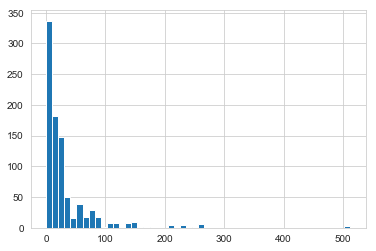

In [6]:
# Examine the distribution of Fare
train_dataset["Fare"].hist(bins=50)

From the output above we can observe that the range of Fare variable contains a few extreme values. This is also the reason why 50 bins are required to depict the distribution clearly.

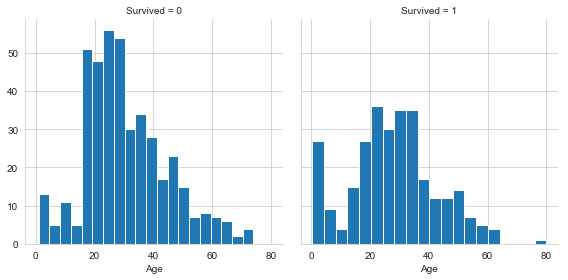

In [7]:
# Examine the distribution of Age against Survived variable
g = sns.FacetGrid(train_dataset, col='Survived',height=4, aspect=1)
g.map(plt.hist, 'Age', bins=20)

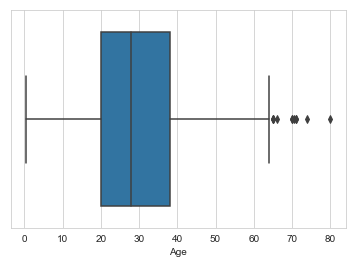

In [8]:
sns.boxplot('Age',data=train_dataset)

From the output, we can observe that the various age groups have some correlation to survival. For example, majority of the passengers are in 15-35 age range. A large number of 20-40 year olds did not survive, while children (Age <=20) had high survival rate. Hence, we should complete the missing values in the Age variable and create new feature for Age groups. This turns a continous numerical feature into an ordinal categorical feature. 

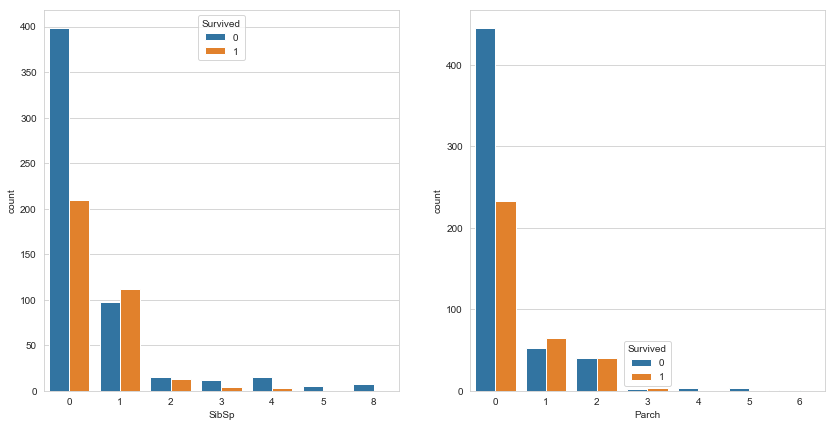

In [9]:
# Examine the distribution of Sibsb and Parch against Survived variable
f,ax = plt.subplots(1,2,figsize=(14,7))
sns.countplot('SibSp',hue='Survived',data=train_dataset,ax=ax[0])
sns.countplot('Parch',hue='Survived',data=train_dataset,ax=ax[1])

The distribution for SibSp and Parch is similar, passengers that were alone (Sibsp or Pclass = 0) or have large families (SibSp or Parch >= 3) were also more likely to die. However, both variables have zero correlation for certain values, hence it may be best to engineer a feature such as family size from the two varaibles.

### Categorical data analysis

In [10]:
# include 'O' simply means only include object type variables in dataset
train_dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Mudd, Mr. Thomas Charles",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


#### Insights of categorical variables in dataset
- Ticket varaible has a significantly high number of duplicates by looking at the number of unique values, (891 - 681) = 210
- Cabin varaible has a significantly high number of missing values, (891-204)= 687. Embarked has (891-889) 2 missing values.
- The number of unique names implies that each name is unique in the dataset (count=unique=891)
- Most passengers in the dataset emabarked at Southampton (644 passengers out of 889)
- Majority of passengers in dataset are males by looking at the "top" row for Sex column.(577/891 = 65%)

#### Sex

Pecentage of females survived: 74.20382165605095
Pecentage of males survived: 18.890814558058924


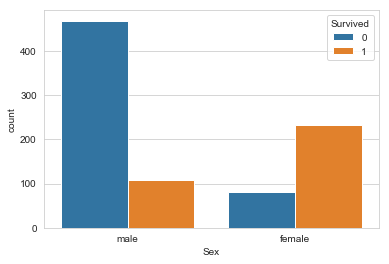

In [11]:
# Examine the distrivution of Sex against Survived variable

sns.countplot('Sex',hue='Survived',data=train_dataset)

# Get percentage of male and female survivors
malesurvived = train_dataset["Survived"][train_dataset["Sex"] == 'male'].value_counts(normalize = True)[1]*100
femalesurvived = train_dataset["Survived"][train_dataset["Sex"] == 'female'].value_counts(normalize = True)[1]*100
print("Pecentage of females survived:",femalesurvived)
print("Pecentage of males survived:",malesurvived)

We can observe that females had a significantly higher survival rate compared to males, hence this feature would crucial for our model.

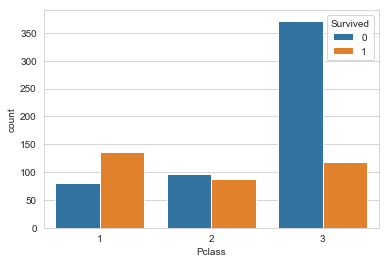

In [12]:
# Examine the distribution of Pclass against Survived variable
sns.countplot('Pclass',hue='Survived',data=train_dataset)

For Pclass, we can observe that there were more passengers in the lowest class, Pclass = 3. Moreover, we can observe that there is significant correlation between the survival rate and the Pclass. This is because there is significantly more people who did not survived in the lowest class compared to the higher classes Pclass = 2 and 3. Hence, Pclass should be included in the model

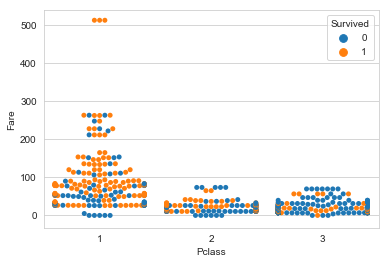

In [13]:
# Examine fare distribution in each Pclass against Survived
sns.swarmplot(x='Pclass',y='Fare',hue='Survived',data=train_dataset)

The output confirms that Pclass has a strong correlation against the survival rate. However, it is also observed that passengers that paid a higher fare in each Pclass also had a better survival rate. We can catgorise the fares into ranges for feature engineering.

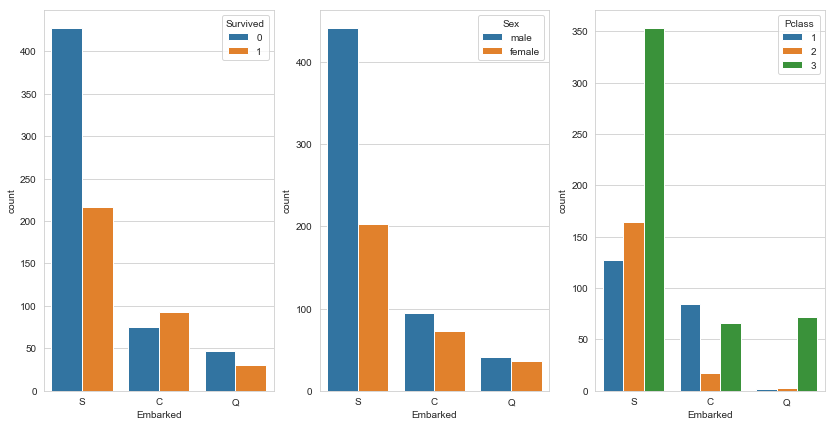

In [14]:
f,ax = plt.subplots(1,3,figsize=(14,7))
sns.countplot('Embarked',hue='Survived',data=train_dataset,ax=ax[0])
sns.countplot('Embarked',hue='Sex',data=train_dataset,ax=ax[1])
sns.countplot('Embarked',hue='Pclass',data=train_dataset,ax=ax[2])

From the output above, we can observe there is some correlation between Embarked, Sex and Pclass, even though there might not be any direct correlation between Embarked and Survival. It is observed that Southampton had the most number of deaths among the three ports, it is also the port with the most number of males and the most number of passengers from the lowest class. In contrast, Cherbourg had the most survivors, this may be due to the large number of passengers in the highest class that boarded at Cherbourg. Hence, Embarked should be included in the model as it is correlated to the other features.

## Data Cleaning

### Filling and dropping features
From the assumptions based on the data analysis above, we should fill up the Age and Embarked features. However, the null values in cabin will be used later in feature engineering thus it will not be filled up. We can also drop PassengerId and Ticket from the dataset. This is because PassengerId is just a unique identifier for each passenger and is not correlated to Survived. On the other hand, Ticket is a random string that contains a high percentage of duplicates (22%).

In [15]:
#Fill Age with median (as there are quite a number of outliers i decided to use median over mean), and Embarked with mode
train_dataset['Age'].fillna(train_dataset['Age'].median(),inplace=True)
train_dataset['Embarked'].fillna(train_dataset['Embarked'].mode()[0], inplace = True)

# Drop variables mentioned above
drop_columns = ['PassengerId','Ticket']
train_dataset.drop(drop_columns,axis=1, inplace = True)

print(train_dataset.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      0
dtype: int64


## Feature Engineering
### Cabin

C:\Poly\AI\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


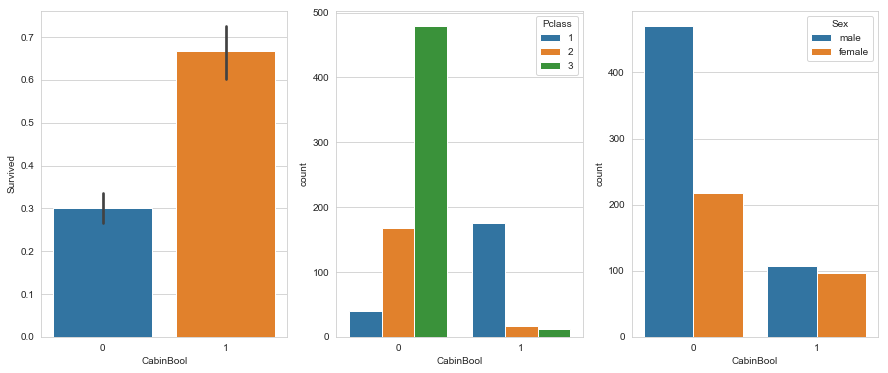

In [16]:
# Split null values as 0, and rows with non-empty cabin values as 1
train_dataset["CabinBool"] = (train_dataset["Cabin"].notnull().astype('int64'))

#draw a bar plot of CabinBool vs. survival, and Pclass relation to CabinBool
f,ax = plt.subplots(1,3,figsize=(15,6))
sns.barplot(x="CabinBool", y="Survived", data=train_dataset,ax=ax[0])
sns.countplot("CabinBool",hue="Pclass",data=train_dataset,ax=ax[1])
sns.countplot("CabinBool",hue="Sex",data=train_dataset,ax=ax[2])
plt.show()

We observed that passengers with a cabin had a higher survival rate compared that those that did not have one from the first. The assumption created here is that higher class passengers tend to have a cabin. This can be confirmed by the middle graph as majority of the passegers that had a cabin number were from Pclass 1. In contrast, most of the passengers who did not have a Cabin number were from the lowest class. Lastly, we also observe that majority of the passengers who did not have a cabin were males, which would also explain the low survival rate for non-cabin passengers because males were less likely to survive.  

In [17]:
# As CabinBool feature is created, we can drop Cabin variable from dataset.
train_dataset.drop("Cabin",axis=1, inplace = True)
# Check if cabin has been removed and CabinBool is completed
train_dataset.info()
#encode all catgorical variables (use pd.get_dummies)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null object
CabinBool    891 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


### Age

We perform binning on the Age variable to convert it into a categorical variable, this can be acheived by splitting the variable into different age groups. We know that the oldest passenger is 80 years old and the youngest passenger is 0 years old. Hence, we can split the range into 5 groups, 80/5 = 16 (Each range would contain 16 years for example 0-15,16-31,32-47..)

In [18]:
train_dataset['Agebin']=pd.cut(train_dataset.Age.astype('int64'),5)
train_dataset[['Agebin', 'Survived']].groupby(['Agebin'], as_index=False).mean().sort_values(by='Agebin', ascending=True)

,Agebin,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


From the table above, we can see that children (Age <= 16) had the highest survival rate, while elderly (Age > 64) had the lowest survival rate.

In [19]:
# Remove Age variable from dataset
# train_dataset.drop('Age',axis=1, inplace = True)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
SibSp        891 non-null int64
Parch        891 non-null int64
Fare         891 non-null float64
Embarked     891 non-null object
CabinBool    891 non-null int64
Agebin       891 non-null category
dtypes: category(1), float64(2), int64(5), object(3)
memory usage: 70.6+ KB


### SibSp & Pclass
We can create a feature that can determine the number of family members each person has, this can be done by adding the SibSp and Pclass of each passenger together.

In [20]:
# Create FamilySize feature to display how many family members is the passenger travelling with
# we add one as familysize will always be 1 (Individual passenger), and > 1 when they are with a family member
train_dataset['FamilySize'] = train_dataset['SibSp'] + train_dataset['Parch'] + 1

train_dataset[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize')

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


The result proves our assumption, as passengers that are alone and are travelling with large families (FamilySize > 4) have a smaller chance of survival. Next, we can create another feature that can determine if the passenger is travelling alone.

In [21]:
train_dataset['IsAlone']=1 # 1 denotes that the passenger is indeed alone
train_dataset.loc[train_dataset['FamilySize'] > 1, 'IsAlone'] = 0 # 0 
train_dataset[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Only 30 percent of passengers that were alone survived, compared to half of the passengers that were travelling with a family member on board. Lastly, we can drop Parch, SibSp and FamilySize from the dataset as we just need the IsAlone feature.

In [22]:
drop_columns = ["Parch","SibSp","FamilySize"]
train_dataset.drop(drop_columns,axis=1, inplace = True)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Name         891 non-null object
Sex          891 non-null object
Age          891 non-null float64
Fare         891 non-null float64
Embarked     891 non-null object
CabinBool    891 non-null int64
Agebin       891 non-null category
IsAlone      891 non-null int64
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 63.7+ KB


### Name
The title of each name can be extracted from each name of the passenger, this can be useful as it is correlated to Age and Sex (for example Master is used to address young males), and can be also indirectly related to Survived.

In [23]:
# Extract Title from name of passenger
train_dataset['Title'] = train_dataset.Name.str.extract('([A-Za-z]+)\.', expand=False)

# print average age for each title
print(train_dataset[['Title', 'Age']].groupby(['Title'], as_index=False).mean())
print("\n")
print(pd.crosstab(train_dataset['Title'], train_dataset['Sex']))

       Title        Age
0       Capt  70.000000
1        Col  58.000000
2   Countess  33.000000
3        Don  40.000000
4         Dr  40.000000
5   Jonkheer  38.000000
6       Lady  48.000000
7      Major  48.500000
8     Master   6.916750
9       Miss  23.005495
10      Mlle  24.000000
11       Mme  24.000000
12        Mr  31.362669
13       Mrs  34.824000
14        Ms  28.000000
15       Rev  43.166667
16       Sir  49.000000


Sex       female  male
Title                 
Capt           0     1
Col            0     2
Countess       1     0
Don            0     1
Dr             1     6
Jonkheer       0     1
Lady           1     0
Major          0     2
Master         0    40
Miss         182     0
Mlle           2     0
Mme            1     0
Mr             0   517
Mrs          125     0
Ms             1     0
Rev            0     6
Sir            0     1


From the result above, it is observed that the title of the passenger's title has some correlation to the passenger's age. For example, the mean age of Master is 6 which accurately bands to the Age groups. The majority of the passengers' title belonng to either Master, Miss, Mr, and Mrs. Next, we can group the corresponding Age groups for our model.

In [24]:
# Group all the minority titles into one group
train_dataset.Title = train_dataset.Title.replace(['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Misc')

# Change the abbrevations of some titles so that the titles are in the same group
train_dataset.Title = train_dataset.Title.replace('Mlle', 'Miss')
train_dataset.Title = train_dataset.Title.replace('Ms', 'Miss')
train_dataset.Title = train_dataset.Title.replace('Mme', 'Mrs')


train_dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mr,0.156673
1,Misc,0.347826
0,Master,0.575000
2,Miss,0.702703
4,Mrs,0.793651


We observe that Mr has the loweset survival rate while females, such as Miss and Mrs, have the highest survival rates. This observation matches with our earlier assumptions that sex correlates with survival

In [27]:
train_dataset.drop("Name",axis=1, inplace = True)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          891 non-null float64
Fare         891 non-null float64
Embarked     891 non-null object
CabinBool    891 non-null int64
Agebin       891 non-null category
IsAlone      891 non-null int64
Title        891 non-null object
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 63.7+ KB


### Fare

We want to create a new feature that bands the fare into different groups, so that the groups/ordinal values can be encoded for our model. As there are many outliers for fare, we use qcut instead of cut to split the values according the number of bins.

In [28]:
train_dataset['FareGroup'] = pd.qcut(train_dataset['Fare'], 4)
train_dataset[['FareGroup', 'Survived']].groupby(['FareGroup'], as_index=False).mean().sort_values(by='FareGroup', ascending=True)

,FareGroup,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


We observe that the passengers that paid a higher fare have indeed a higher survival rate. We can remove the Fare variable.

In [29]:
train_dataset.drop("Fare",axis=1, inplace = True)
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null object
Age          891 non-null float64
Embarked     891 non-null object
CabinBool    891 non-null int64
Agebin       891 non-null category
IsAlone      891 non-null int64
Title        891 non-null object
FareGroup    891 non-null category
dtypes: category(2), float64(1), int64(4), object(3)
memory usage: 57.6+ KB


## Convert formats

In [30]:
from sklearn.preprocessing import LabelEncoder
var_mod = ["Pclass","Sex","Embarked","CabinBool","Agebin","IsAlone","Title","FareGroup"]
le = LabelEncoder()
for i in var_mod:
    train_dataset[i] = le.fit_transform(train_dataset[i])
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Sex          891 non-null int64
Age          891 non-null float64
Embarked     891 non-null int64
CabinBool    891 non-null int64
Agebin       891 non-null int64
IsAlone      891 non-null int64
Title        891 non-null int64
FareGroup    891 non-null int64
dtypes: float64(1), int64(9)
memory usage: 69.7 KB


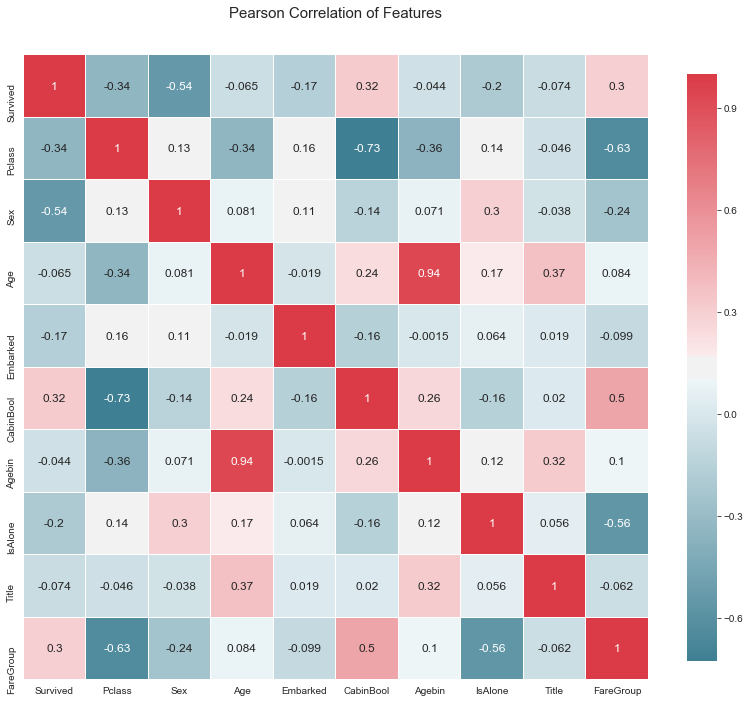

In [33]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train_dataset)

In [47]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
 #For K-fold cross validation
from sklearn.model_selection import KFold  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics



#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
    #Fit the model:
    model.fit(data[predictors],data[outcome])
  
    #Make predictions on training set:
    predictions = model.predict(data[predictors])
  
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

    #Perform k-fold cross-validation with 5 folds
    kf = KFold(n_splits=5)
    error = []
    for trainidx, testidx in kf.split(data):
        # Filter training data
        train_predictors = (data[predictors].iloc[trainidx,:])
    
        # The target we're using to train the algorithm.
        train_target = data[outcome].iloc[trainidx]
    
        # Training the algorithm using the predictors and target.
        model.fit(train_predictors, train_target)
    
        #Record error from each cross-validation run
        error.append(model.score(data[predictors].iloc[testidx,:], data[outcome].iloc[testidx]))
        
    print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(data[predictors],data[outcome])


In [49]:
outcome_var = "Survived"
model =  DecisionTreeClassifier()
predictor_var = ["Pclass","Sex","CabinBool","IsAlone","FareGroup","Title","Embarked","Agebin"]
classification_model(model, train_dataset,predictor_var,outcome_var)

Accuracy : 87.879%
Cross-Validation Score : 80.588%
